# Time Frame Momentum
참고 : https://henryquant.blogspot.com/2018/11/time-frame-momentum-in-s-500.html

In [1]:
import pandas as pd
import numpy as np

#  차트 설정
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

plt.rcParams["font.family"] = 'DejaVu Serif'
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True
# 한글폰트 사용시 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [53]:
df_sp500 = pd.read_csv(r'D:\stock_data\^spx_d.csv',parse_dates=True,index_col=0)
df_sp500_month = df_sp500.loc[df_sp500.groupby(df_sp500.index.to_period('M')).apply(lambda x: x.index.max())]

In [3]:
pd.options.mode.chained_assignment = None

In [54]:
df_sp500_month['change_1'] = df_sp500_month['Close']/df_sp500_month['Close'].shift(1) - 1   

for i in range(3,13):
    #print(i)
    df_sp500_month['change_'+str(i)] = df_sp500_month['Close']/df_sp500_month['Close'].shift(i) - 1    

In [55]:
try:
    df_sp500_month.drop(['Open','High','Low','Volume'], axis=1, inplace=True)
except:
    pass
df_sp500_month

,Close,change_1,change_3,change_4,change_5,change_6,change_7,change_8,change_9,change_10,change_11,change_12
Date,,,,,,,,,,,,
1900-05-31,6.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-06-30,6.01,-0.062402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-07-31,6.15,0.023295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-08-31,6.25,0.016260,-0.024961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-09-29,6.03,-0.035200,0.003328,-0.059282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-10-31,6.43,0.066335,0.045528,0.069884,0.003120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-11-30,7.20,0.119751,0.152000,0.170732,0.198003,0.123245,NaN,NaN,NaN,NaN,NaN,NaN
1900-12-31,7.68,0.066667,0.273632,0.228800,0.248780,0.277870,0.198128,NaN,NaN,NaN,NaN,NaN
1901-01-31,7.67,-0.001302,0.192846,0.271973,0.227200,0.247154,0.276206,0.196568,NaN,NaN,NaN,NaN


In [56]:
df_sp500_month3 = df_sp500_month.loc[:,'change_1':'change_12']
df_sp500_month3.fillna(0,inplace=True)

for i in range(3,13):    
    df_sp500_month3['val_' + str(i)] = df_sp500_month3['change_' + str(i)].apply(lambda x: 1 if x > 0 else 0)  
    
df_sp500_month3['val_avg'] = df_sp500_month3.loc[:, 'val_3':'val_12'].sum(axis=1)/10   
df_sp500_month3

,change_1,change_3,change_4,change_5,change_6,change_7,change_8,change_9,change_10,change_11,...,val_4,val_5,val_6,val_7,val_8,val_9,val_10,val_11,val_12,val_avg
Date,,,,,,,,,,,,,,,,,,,,,
1900-05-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0.0
1900-06-30,-0.062402,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0.0
1900-07-31,0.023295,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0.0
1900-08-31,0.016260,-0.024961,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0.0
1900-09-29,-0.035200,0.003328,-0.059282,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0.1
1900-10-31,0.066335,0.045528,0.069884,0.003120,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1,1,0,0,0,0,0,0,0,0.3
1900-11-30,0.119751,0.152000,0.170732,0.198003,0.123245,0.000000,0.000000,0.000000,0.000000,0.000000,...,1,1,1,0,0,0,0,0,0,0.4
1900-12-31,0.066667,0.273632,0.228800,0.248780,0.277870,0.198128,0.000000,0.000000,0.000000,0.000000,...,1,1,1,1,0,0,0,0,0,0.5
1901-01-31,-0.001302,0.192846,0.271973,0.227200,0.247154,0.276206,0.196568,0.000000,0.000000,0.000000,...,1,1,1,1,1,0,0,0,0,0.6


In [57]:
df_sp500_month4 = df_sp500_month3[['change_1','val_avg']]
df_sp500_month4 = df_sp500_month4[df_sp500_month4.index > '1980-01-01']

In [73]:
init_stock = 100
init_cash = 0
cash_rate = 0.000
buy_and_hold = 100

df_sp500_month4['return_bh'] = 0
df_sp500_month4['return'] = 0
df_sp500_month4['stock'] = 0
df_sp500_month4['cash'] = 0

# 매월 rebalace
for index,row in df_sp500_month4.iterrows():
    # 이전달 금액에서 수일률 적용
    init_stock = init_stock*(row['change_1'] + 1)  
    init_cash = init_cash * (cash_rate + 1)
    buy_and_hold = buy_and_hold*(row['change_1'] + 1)
    # 데이터프레임에 저장
    df_sp500_month4.loc[index,'return_bh'] = buy_and_hold
    df_sp500_month4.loc[index,'return'] = init_stock + init_cash
    df_sp500_month4.loc[index,'stock'] = (init_stock + init_cash)*row['val_avg']
    df_sp500_month4.loc[index,'cash'] = (init_stock + init_cash) - df_sp500_month4.loc[index,'stock'] 
    # 다음 step으로 값전달    
    init_stock = df_sp500_month4.loc[index,'stock']
    init_cash = df_sp500_month4.loc[index,'cash']    
    buy_and_hold = df_sp500_month4.loc[index,'return_bh']

In [89]:
df_sp500_month4['change_return'] = df_sp500_month4['return']/df_sp500_month4['return'].shift(1) - 1
df_sp500_month4['change_return_bh'] = df_sp500_month4['return_bh']/df_sp500_month4['return_bh'].shift(1) - 1
df_sp500_month4

,change_1,val_avg,return_bh,return,stock,cash,change_return,change_return_bh
Date,,,,,,,,
1980-01-31,0.057625,1.0,105.762461,105.762461,105.762461,0.000000,NaN,NaN
1980-02-29,-0.004380,1.0,105.299240,105.299240,105.299240,0.000000,-0.004380,-0.004380
1980-03-31,-0.101795,0.4,94.580322,94.580322,37.832129,56.748193,-0.101795,-0.101795
1980-04-30,0.041140,0.6,98.471373,96.136743,57.682046,38.454697,0.016456,0.041140
1980-05-30,0.046571,0.8,103.057254,98.823036,79.058429,19.764607,0.027942,0.046571
1980-06-30,0.026969,1.0,105.836576,100.955140,100.955140,0.000000,0.021575,0.026969
1980-07-31,0.065039,1.0,112.720030,107.521113,107.521113,0.000000,0.065039,0.065039
1980-08-29,0.005835,1.0,113.377802,108.148548,108.148548,0.000000,0.005835,0.005835
1980-09-30,0.025168,1.0,116.231240,110.870377,110.870377,0.000000,0.025168,0.025168


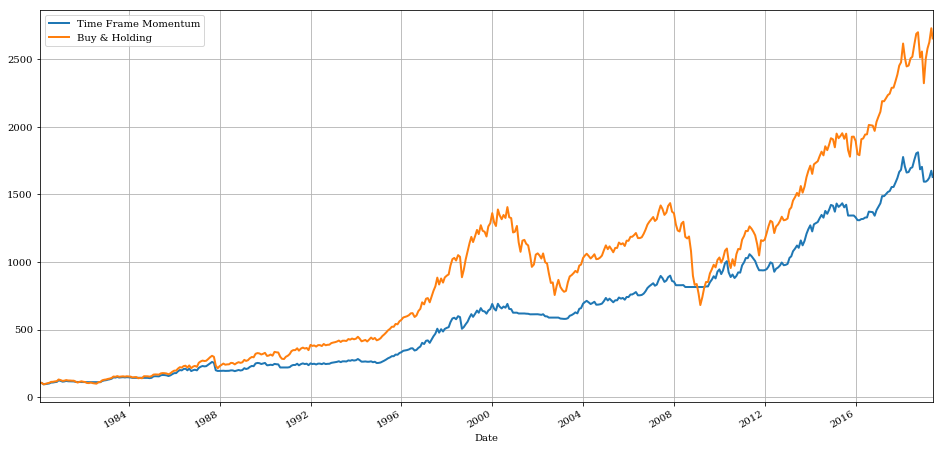

In [75]:
ax = df_sp500_month4[['return','return_bh']].plot(figsize=(16,8))
ax.legend(["Time Frame Momentum", "Buy & Holding"])

# CAGR

In [87]:
number_years = len(df_sp500_month4.groupby(df_sp500_month4.index.year).max())
end_price = float(df_sp500_month4.tail(1)['return'])
start_price = 100
cagr = (pow((end_price/start_price),(1/number_years))-1)*100
print("Time Frame Momentum CAGR : " ,cagr ,"%")

end_price_bh = float(df_sp500_month4.tail(1)['return_bh'])
cagr_bh = (pow((end_price_bh/start_price),(1/number_years))-1)*100
print("Buy & Holding CAGR : " ,cagr_bh ,"%")

Time Frame Momentum CAGR :  7.224679645492049 %
Buy & Holding CAGR :  8.541577627959152 %


# Scaling Volatility

In [109]:
np.std(df_sp500_month4["change_return"]) * np.sqrt(12)

0.10709696008923915

# MDD

In [32]:
df_spx_mdd = df_sp500_month[df_sp500_month.index > '1980-01-01']
df_spx_mdd.head()

,Open,High,Low,Close,Volume,change_1,change_2,change_3,change_4,change_5,change_6,change_7,change_8,change_9,change_10,change_11,change_12
Date,,,,,,,,,,,,,,,,,
1980-01-31,115.20,117.17,113.78,114.16,73222222.0,0.057625,0.075358,0.121194,0.044274,0.044274,0.099701,0.109319,0.152200,0.121855,0.123733,0.185708,0.142400
1980-02-29,112.35,114.12,111.77,113.66,43122222.0,-0.004380,0.052992,0.070648,0.116284,0.039700,0.039700,0.094885,0.104460,0.147154,0.116942,0.118811,0.180515
1980-03-31,100.68,102.65,100.02,102.09,39822222.0,-0.101795,-0.105729,-0.054197,-0.038338,0.002652,-0.066136,-0.066136,-0.016569,-0.007968,0.030379,0.003243,0.004922
1980-04-30,105.86,106.72,104.50,106.29,34277778.0,0.041140,-0.064843,-0.068938,-0.015286,0.001225,0.043901,-0.027717,-0.027717,0.023890,0.032844,0.072769,0.044517
1980-05-30,110.27,111.55,108.87,111.24,38688889.0,0.046571,0.089627,-0.021292,-0.025578,0.030573,0.047852,0.092516,0.017563,0.017563,0.071573,0.080945,0.122729


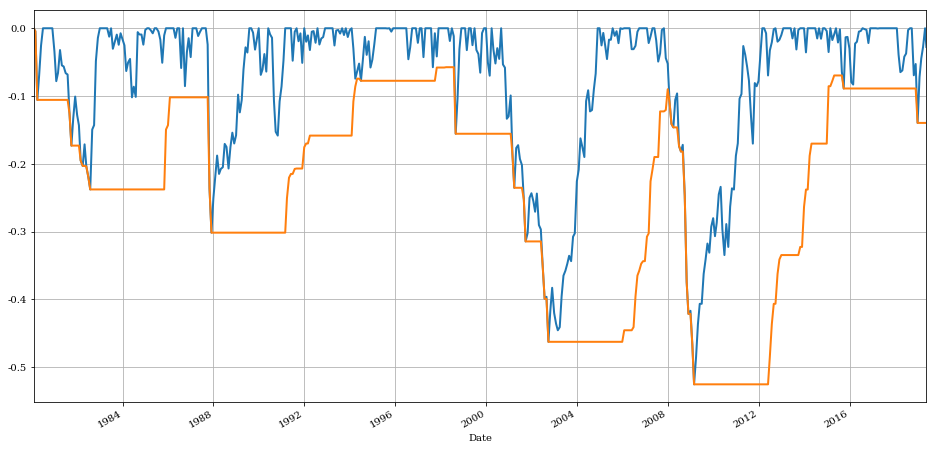

In [33]:
period = len(df_sp500_month4.groupby(df_sp500_month4.index.year).max())
Roll_Max = df_spx_mdd['Close'].rolling(min_periods=1,window=period).max()
Daily_Drawdown = df_spx_mdd['Close']/Roll_Max - 1.0
Max_Daily_Drawdown = Daily_Drawdown.rolling(min_periods=1,window=period).min()
Daily_Drawdown.plot(figsize=(16,8))
Max_Daily_Drawdown.plot()